In [256]:
import pandas as pd #Import Pandas
import matplotlib.pyplot as plt #Import Matplotlib
import numpy as np #Import numpy
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Data Importing

In [277]:
cad_df = pd.read_csv('CAD.csv')
cad_df = cad_df.drop("X", axis=1)
cad_df = cad_df.drop("Y", axis=1)
cad_df = cad_df.drop("OBJECTID", axis=1)
cad_df = cad_df.drop("areaUnitID", axis=1)
cad_df = cad_df.drop("bicycle", axis=1)
cad_df = cad_df.drop("bridge", axis=1)
cad_df = cad_df.drop("bus", axis=1)
cad_df = cad_df.drop("carStationWagon", axis=1)
cad_df = cad_df.drop("cliffBank", axis=1)
cad_df = cad_df.drop("crashDirectionDescription", axis=1)
cad_df = cad_df.drop("crashFinancialYear", axis=1)
cad_df = cad_df.drop("crashLocation1", axis=1)
cad_df = cad_df.drop("crashLocation2", axis=1)
cad_df = cad_df.drop("crashRoadSideRoad", axis=1)
cad_df = cad_df.drop("crashSHDescription", axis=1)
cad_df = cad_df.drop("debris", axis=1)
cad_df = cad_df.drop("directionRoleDescription", axis=1)
cad_df = cad_df.drop("ditch", axis=1)
cad_df = cad_df.drop("fence", axis=1)
cad_df = cad_df.drop("flatHill", axis=1)
cad_df = cad_df.drop("guardRail", axis=1)
cad_df = cad_df.drop("houseOrBuilding", axis=1)
cad_df = cad_df.drop("intersection", axis=1)
cad_df = cad_df.drop("kerb", axis=1)
cad_df = cad_df.drop("meshblockId", axis=1)
cad_df = cad_df.drop("objectThrownOrDropped", axis=1)
cad_df = cad_df.drop("otherObject", axis=1)
cad_df = cad_df.drop("otherVehicleType", axis=1)
cad_df = cad_df.drop("overBank", axis=1)
cad_df = cad_df.drop("parkedVehicle", axis=1)
cad_df = cad_df.drop("pedestrian", axis=1)
cad_df = cad_df.drop("phoneBoxEtc", axis=1)
cad_df = cad_df.drop("postOrPole", axis=1)
cad_df = cad_df.drop("region", axis=1)
cad_df = cad_df.drop("roadCharacter", axis=1)
cad_df = cad_df.drop("roadworks", axis=1)
cad_df = cad_df.drop("schoolBus", axis=1)
cad_df = cad_df.drop("strayAnimal", axis=1)
cad_df = cad_df.drop("suv", axis=1)
cad_df = cad_df.drop("taxi", axis=1)
cad_df = cad_df.drop("slipOrFlood", axis=1)
cad_df = cad_df.drop("temporarySpeedLimit", axis=1)
cad_df = cad_df.drop("tlaId", axis=1)
cad_df = cad_df.drop("tlaName", axis=1)
cad_df = cad_df.drop("trafficControl", axis=1)
cad_df = cad_df.drop("trafficIsland", axis=1)
cad_df = cad_df.drop("trafficSign", axis=1)
cad_df = cad_df.drop("train", axis=1)
cad_df = cad_df.drop("tree", axis=1)
cad_df = cad_df.drop("truck", axis=1)
cad_df = cad_df.drop("unknownVehicleType", axis=1)
cad_df = cad_df.drop("waterRiver", axis=1)


In [278]:
cad_df = cad_df.dropna(axis='rows')
cad_df.head()

,advisorySpeed,crashSeverity,crashYear,fatalCount,holiday,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,roadLane,roadSurface,seriousInjuryCount,speedLimit,streetLight,urban,vanOrUtility,vehicle,weatherA,weatherB
60,65.0,Non-Injury Crash,2019,0.0,Christmas New Year,Dark,0.0,0.0,0.0,2.0,2-way,Sealed,0.0,100.0,None,Open,0.0,0.0,Light rain,Null
159,65.0,Fatal Crash,2020,1.0,Christmas New Year,Bright sun,1.0,0.0,0.0,2.0,2-way,Sealed,1.0,100.0,None,Open,0.0,0.0,Fine,Null
445,75.0,Non-Injury Crash,2006,0.0,Labour Weekend,Dark,0.0,0.0,0.0,2.0,2-way,Sealed,0.0,100.0,None,Open,0.0,0.0,Light rain,Null
490,65.0,Non-Injury Crash,2004,0.0,Christmas New Year,Dark,0.0,0.0,0.0,2.0,2-way,Sealed,0.0,100.0,None,Open,0.0,0.0,Fine,Null
588,25.0,Non-Injury Crash,2013,0.0,Christmas New Year,Bright sun,0.0,0.0,0.0,2.0,2-way,Sealed,0.0,100.0,Null,Open,0.0,0.0,Fine,Null


# Preliminary Visualization

Text(0.5, 1.0, 'Speed Limit vs Fatalaties')

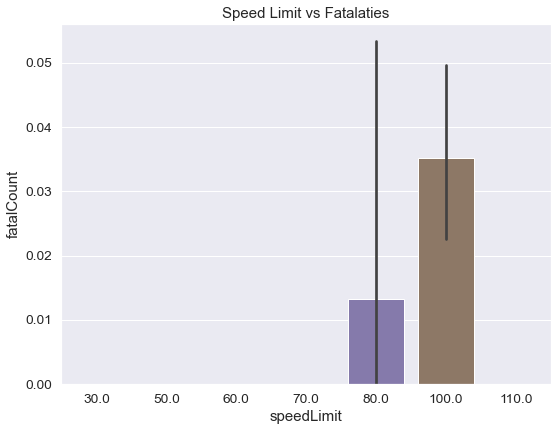

In [279]:
plt.figure(figsize=(8,6))
sns.barplot(x="speedLimit", y="fatalCount",  data=cad_df);
plt.tight_layout()
plt.title("Speed Limit vs Fatalaties")

Text(0.5, 1.0, 'Road Surface vs Fatalaties')

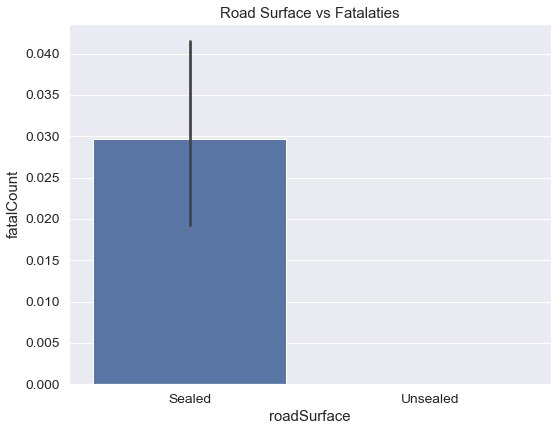

In [280]:
plt.figure(figsize=(8,6))
sns.barplot(x='roadSurface',y = 'fatalCount',data=cad_df)
plt.tight_layout()
plt.title("Road Surface vs Fatalaties")

Text(0.5, 1.0, 'Crash Year vs Fatalaties')

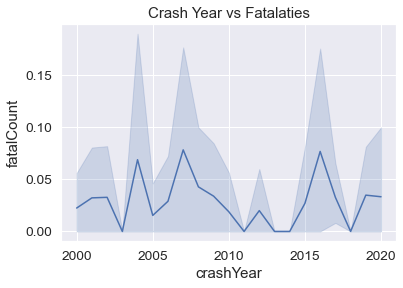

In [281]:

sns.lineplot(x="crashYear", y="fatalCount",data=cad_df);
plt.title("Crash Year vs Fatalaties")

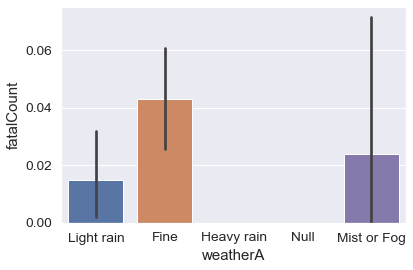

In [282]:
sns.barplot(x="weatherA", y="fatalCount",  data=cad_df);
plt.tight_layout()

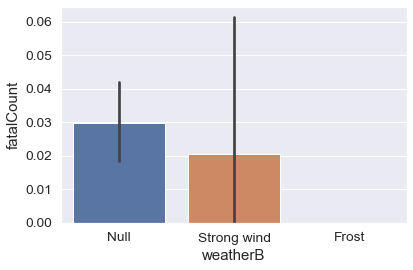

In [283]:
sns.barplot(x="weatherB", y="fatalCount",  data=cad_df);
plt.tight_layout()

# Preparing Data For Modeling & Histograms

In [284]:
# Function to convert text (str) data to int representations.
# Returns a dictionary containing the original key that maps to the new integer representation.

def convert_to_int(name):
    keydict = {}
    x = 0
    for i in cad_df[name]:
        if i not in keydict.keys():
            keydict[i] = x
            x += 1
            
    cad_df[name].replace(keydict, inplace=True)
    return keydict

In [285]:
crashSevKey = convert_to_int('crashSeverity')
holidayKey = convert_to_int('holiday')
lightKey = convert_to_int('light')
roadLaneKey = convert_to_int('roadLane')
roadSurfKey = convert_to_int('roadSurface')
streetLightKey = convert_to_int('streetLight')
urbanKey = convert_to_int('urban')
weatherAKey = convert_to_int('weatherA')
weatherBKey = convert_to_int('weatherB')

print("DATA KEYS")
print('----------------------------------------------------------------')
print("Crash Severity Key")
print(crashSevKey)
print('----------------------------------------------------------------')
print("Holiday Key")
print(holidayKey)
print('----------------------------------------------------------------')
print("Light Key")
print(lightKey)
print('----------------------------------------------------------------')
print("Road Lane Key")
print(roadLaneKey)
print('----------------------------------------------------------------')
print("Road Surface Key")
print(roadSurfKey)
print('----------------------------------------------------------------')
print("Street Light Key")
print(streetLightKey)
print('----------------------------------------------------------------')
print("Urban Key")
print(urbanKey)
print('----------------------------------------------------------------')
print("Weather A Key")
print(weatherAKey)
print('----------------------------------------------------------------')
print("Weather B Key")
print(weatherBKey)
print('----------------------------------------------------------------')

DATA KEYS
----------------------------------------------------------------
Crash Severity Key
{'Non-Injury Crash': 0, 'Fatal Crash': 1, 'Minor Crash': 2, 'Serious Crash': 3}
----------------------------------------------------------------
Holiday Key
{'Christmas New Year': 0, 'Labour Weekend': 1, 'Easter': 2, 'Queens Birthday': 3}
----------------------------------------------------------------
Light Key
{'Dark': 0, 'Bright sun': 1, 'Overcast': 2, 'Twilight': 3, 'Unknown': 4}
----------------------------------------------------------------
Road Lane Key
{'2-way': 0, '1-way': 1, 'Off road': 2}
----------------------------------------------------------------
Road Surface Key
{'Sealed': 0, 'Unsealed': 1}
----------------------------------------------------------------
Street Light Key
{'None': 0, 'Null': 1, 'Off': 2, 'On': 3}
----------------------------------------------------------------
Urban Key
{'Open': 0, 'Urban': 1}
----------------------------------------------------------------
W

In [286]:
cad_df['fatalCount'].replace({2.0:1, 3.0:1, 4.0:1, 5.0:1, 6.0:1, 7.0:1, 8.0:1, 9.0:1}, inplace=True)
print(max(cad_df['fatalCount']))

1.0


# Crash Results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017985175E80>,
      dtype=object)

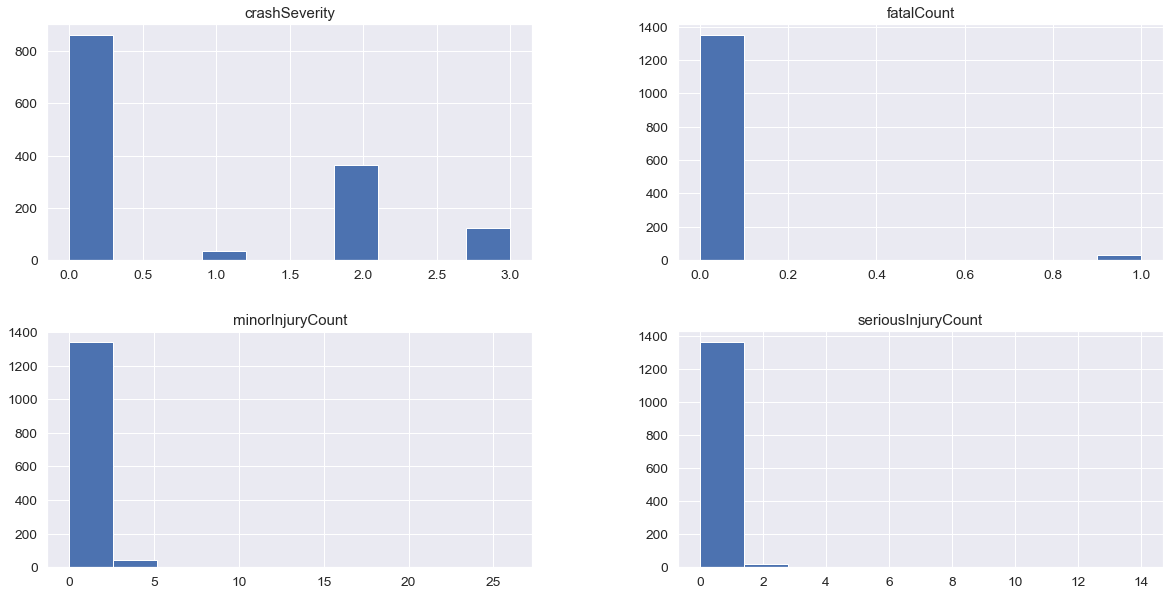

In [287]:
cad_df.hist(column=['crashSeverity', 'minorInjuryCount', 'seriousInjuryCount', 'fatalCount'], figsize=(20,10))

# Crash Vehicle Information

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179840F45E0>,
      dtype=object)

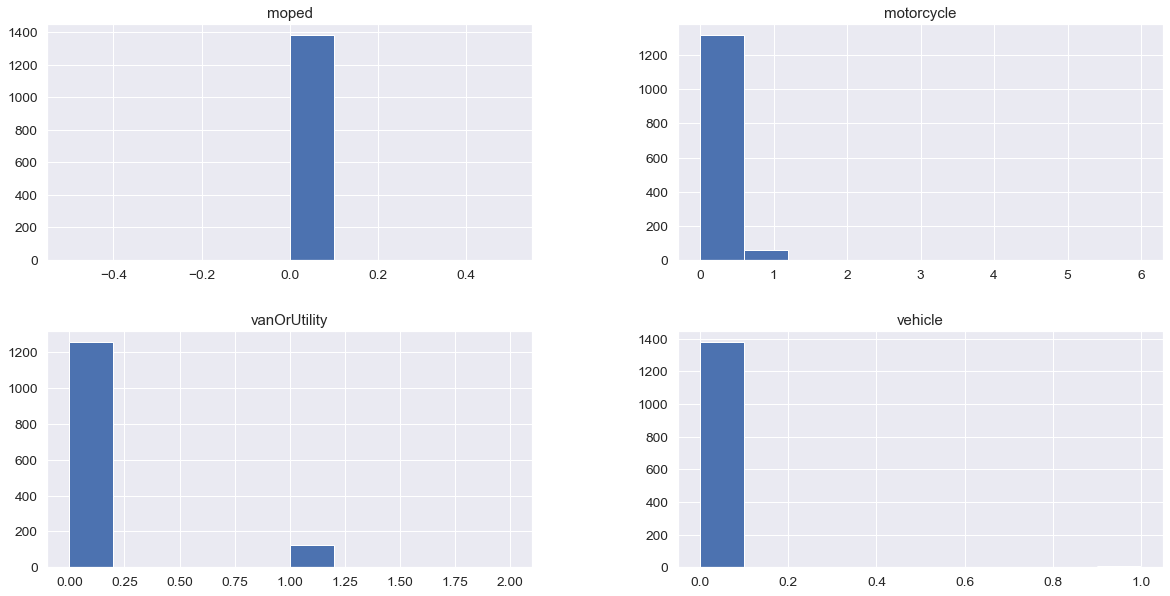

In [288]:
cad_df.hist(column=['vehicle', 'moped', 'motorcycle', 'vanOrUtility'], figsize=(20,10))

# Crash Street Information

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017987FF9EE0>,
      dtype=object)

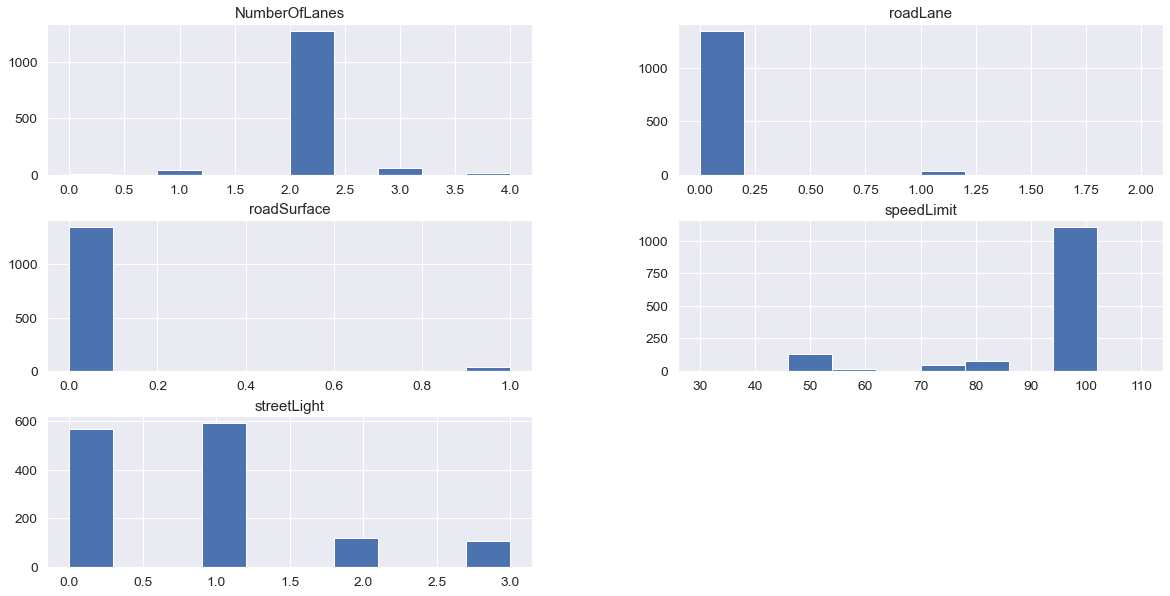

In [289]:
cad_df.hist(column=['speedLimit', 'streetLight', 'NumberOfLanes', 'roadLane',
                   'roadSurface'], figsize=(20,10))

# Crash Enviornment Information

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179954D4BE0>,
      dtype=object)

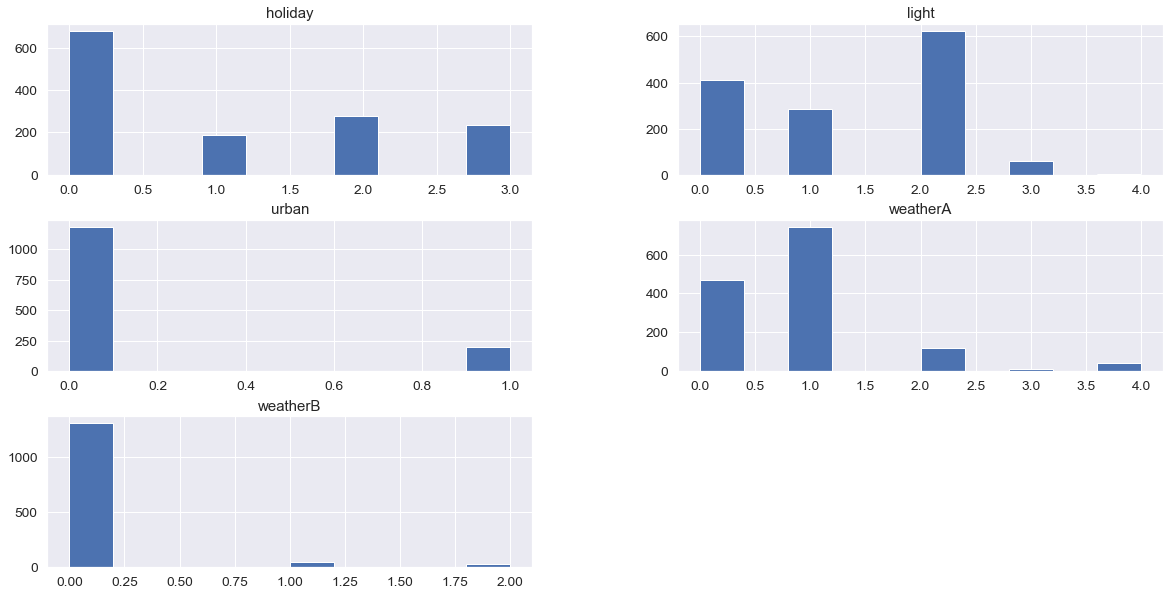

In [290]:
cad_df.hist(column=['urban', 'light', 'weatherA', 'weatherB', 'holiday'], figsize=(20,10))

# Visualizing Correlations

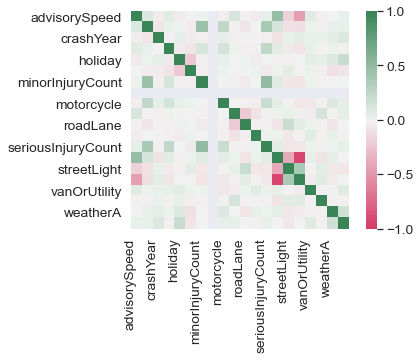

In [291]:
corr = cad_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(1, 500, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [292]:
Y = cad_df['fatalCount']
X = cad_df.loc[:, cad_df.columns != 'fatalCount']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fatalCount   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     8.649
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.61e-22
Time:                        19:53:21   Log-Likelihood:                 712.14
No. Observations:                1383   AIC:                            -1386.
Df Residuals:                    1364   BIC:                            -1287.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5741      1.279      0.449      0.654      -1.935       3.083
advisorySpeed          0.0006      0.000      2.099      0.036    3.68e-05       0.001
crashSeverity         -0.0198      0.004     -4.636      0.000      -0.028      -0.011
crashYear             -0.0003      0.001     -0.440      0.660      -0.002       0.001
holiday               -0.0082      0.004     -2.322      0.020      -0.015      -0.001
light                 -0.0135      0.004     -3.110      0.002      -0.022      -0.005
minorInjuryCount       0.0091      0.005      2.000      0.046       0.000       0.018
moped               1.351e-15   2.94e-15      0.459      0.646   -4.43e-15    7.13e-15
motorcycle             0.0738      0.014      5.193      0.000       0.046       0.102
NumberOfLanes          0.0038      0.012      0.306      0.760      -0.021       0.028
roadLane              -0.0170      0.025     -0.680      0.497      -0.066       0.032
roadSurface           -0.0244      0.026     -0.939      0.348      -0.075       0.027
seriousInjuryCount     0.0676      0.009      7.604      0.000       0.050       0.085
speedLimit         -3.756e-05      0.001     -0.052      0.958      -0.001       0.001
streetLight           -0.0020      0.005     -0.404      0.687      -0.012       0.008
urban                 -0.0107      0.032     -0.334      0.738      -0.074       0.052
vanOrUtility           0.0215      0.013      1.597      0.111      -0.005       0.048
vehicle               -0.0099      0.066     -0.150      0.881      -0.140       0.120
weatherA               0.0008      0.005      0.161      0.872      -0.009       0.010
weatherB              -0.0139      0.012     -1.113      0.266      -0.038       0.011
==============================================================================
Omnibus:                     1553.660   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79640.387
Skew:                           5.869   Prob(JB):                         0.00
Kurtosis:                      38.274   Cond. No.                     9.44e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [293]:
cad_df = cad_df.drop("moped", axis=1)
cad_df = cad_df.drop("NumberOfLanes", axis=1)
cad_df = cad_df.drop("roadLane", axis=1)
cad_df = cad_df.drop("urban", axis=1)
cad_df = cad_df.drop("vanOrUtility", axis=1)
cad_df = cad_df.drop("crashYear", axis=1)

Y = cad_df['fatalCount']
X = cad_df.loc[:, cad_df.columns != 'fatalCount']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fatalCount   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.72
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           2.00e-24
Time:                        19:53:38   Log-Likelihood:                 710.41
No. Observations:                1383   AIC:                            -1393.
Df Residuals:                    1369   BIC:                            -1320.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.339e-05      0.028      0.003      0.998      -0.054       0.054
advisorySpeed          0.0006      0.000      2.247      0.025    7.53e-05       0.001
crashSeverity         -0.0195      0.004     -4.587      0.000      -0.028      -0.011
holiday               -0.0080      0.004     -2.265      0.024      -0.015      -0.001
light                 -0.0132      0.004     -3.047      0.002      -0.022      -0.005
minorInjuryCount       0.0091      0.005      1.994      0.046       0.000       0.018
motorcycle             0.0722      0.014      5.099      0.000       0.044       0.100
roadSurface           -0.0221      0.026     -0.857      0.392      -0.073       0.028
seriousInjuryCount     0.0677      0.009      7.625      0.000       0.050       0.085
speedLimit             0.0002      0.000      0.647      0.518      -0.000       0.001
streetLight           -0.0024      0.005     -0.502      0.616      -0.012       0.007
vehicle               -0.0083      0.066     -0.126      0.900      -0.137       0.120
weatherA               0.0007      0.005      0.154      0.877      -0.009       0.010
weatherB              -0.0130      0.012     -1.052      0.293      -0.037       0.011
==============================================================================
Omnibus:                     1556.673   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80164.419
Skew:                           5.887   Prob(JB):                         0.00
Kurtosis:                      38.391   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
classifications = cad_df['fatalCount']
features = cad_df.loc[:, cad_df.columns != 'fatalCount']

cols = features.columns

scaler = StandardScaler()

features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns= cols)

x_train, x_test, y_train, y_test = train_test_split(features, classifications, random_state=18)
features.describe()

,advisorySpeed,crashSeverity,holiday,light,minorInjuryCount,motorcycle,roadSurface,seriousInjuryCount,speedLimit,streetLight,vehicle,weatherA,weatherB
count,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03
mean,-1.441765e-16,-2.169069e-16,9.039126e-17,7.883145e-17,-5.258106e-17,-2.730603e-16,-4.328505e-16,-1.053829e-16,9.264703e-16,1.514816e-16,1.071189e-16,-1.414671e-16,5.636610e-16
std,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00
min,-2.417027e+00,-7.440969e-01,-8.951652e-01,-1.333048e+00,-4.057043e-01,-1.884529e-01,-1.563472e-01,-2.340164e-01,-3.824894e+00,-9.414835e-01,-6.023659e-02,-1.016446e+00,-2.266491e-01
25%,-6.583029e-01,-7.440969e-01,-8.951652e-01,-1.333048e+00,-4.057043e-01,-1.884529e-01,-1.563472e-01,-2.340164e-01,4.638249e-01,-9.414835e-01,-6.023659e-02,-1.016446e+00,-2.266491e-01
50%,-7.206149e-02,-7.440969e-01,-4.018352e-02,-2.605610e-01,-4.057043e-01,-1.884529e-01,-1.563472e-01,-2.340164e-01,4.638249e-01,1.927253e-01,-6.023659e-02,1.728474e-01,-2.266491e-01
75%,5.141800e-01,1.074076e+00,8.147982e-01,8.119266e-01,5.186598e-01,-1.884529e-01,-1.563472e-01,-2.340164e-01,4.638249e-01,1.927253e-01,-6.023659e-02,1.728474e-01,-2.266491e-01
max,2.272904e+00,1.983163e+00,1.669780e+00,2.956902e+00,2.362776e+01,2.012040e+01,6.396021e+00,2.610916e+01,1.076499e+00,2.461143e+00,1.660120e+01,3.740726e+00,5.859870e+00


In [374]:
print(x_train.shape)
print(y_train.shape)

(1037, 13)
(1037,)


In [375]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
pred = logit.predict(x_test)
print(max(pred))

1.0


In [376]:
print(confusion_matrix(y_test, pred))
print("ACCURACY: {:.2f}%".format(accuracy_score(y_test, pred)*100))

[[334   1]
 [  9   2]]
ACCURACY: 97.11%


In [377]:
print(y_test.shape)
print(pred.shape)

(346,)
(346,)


In [378]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.predict(x_test)
print("KNN SCORE: {:.2f}%".format(100*knn.score(x_train, y_train)))

KNN SCORE: 98.36%


In [379]:
from sklearn import svm
my_model = svm.SVC(kernel='linear', C=10)
my_model.fit(x_train, y_train)
print("SVM SCORE: {:.2f}%".format(100*my_model.score(x_train, y_train)))

SVM SCORE: 97.97%
